In [22]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import descartes
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as ctx

%matplotlib inline


In [65]:
#Read in shape file
ufo_map = gpd.read_file('cb_2018_us_nation_5m/cb_2018_us_nation_5m.shp')

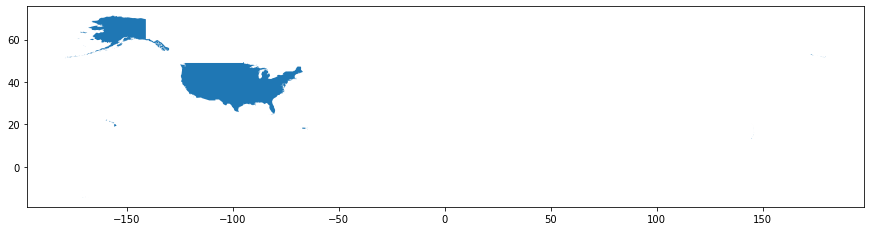

In [66]:
fig,ax = plt.subplots(figsize = (15,15))
ufo_map.plot(ax = ax)

#How to add basemap layer? 
#ax = alien_df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
#ctx.add_basemap(ax)

In [58]:
#Read in alien data and add basemap layer 

alien_df = pd.read_csv('../project-1-alien-analysis/alien_region.csv')
crs = {'init': 'epsg:4326'}


/Users/mecross/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [67]:
#Create points for latitude and longitude 
geometry = [Point(xy) for xy in zip(alien_df["longitude "], alien_df["latitude"])]
geometry[:3]

In [60]:
#Use points to create GeoDataFrame 
geo_alien_df = gpd.GeoDataFrame(alien_df, 
                              crs = crs, #specifying coordinate reference system
                              geometry = geometry) #specify geometry list we've created

geo_alien_df.head()

,Unnamed: 0,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year,region,geometry
0,0,10/10/1993 22:00,peoria,il,us,light,8,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993,Midwest,POINT (-89.58889 40.69361)
1,1,10/10/1998 13:15,elgin,il,us,cylinder,1800,30 +/- min,While looking up at sky I noticed a bright lig...,11/1/1998,42.037222,-88.281111,10,10,13:15,1998,Midwest,POINT (-88.28111 42.03722)
2,2,10/10/2004 15:00,rock island,il,us,sphere,3600,1 hour,The sky was clear and the objects at times ap...,10/27/2004,41.509444,-90.578611,10,10,15:00,2004,Midwest,POINT (-90.57861 41.50944)
3,3,10/10/2010 20:45,sterling,il,us,cylinder,600,10min,It had rows of white lights with red lights pu...,11/21/2010,41.788611,-89.696111,10,10,20:45,2010,Midwest,POINT (-89.69611 41.78861)
4,4,10/10/2012 20:30,marion,il,us,light,240,2 to 4 minutes,I was leaving my friend&#39s house to go home....,10/30/2012,37.730556,-88.933056,10,10,20:30,2012,Midwest,POINT (-88.93306 37.73056)


In [73]:
#Establish bounds to zoom in on map 
ufo_bounds = ufo_map.geometry.total_bounds
ufo_bounds

#Create x and y mins and max to establish bounds
xmin, ymin, xmax, ymax = ufo_bounds

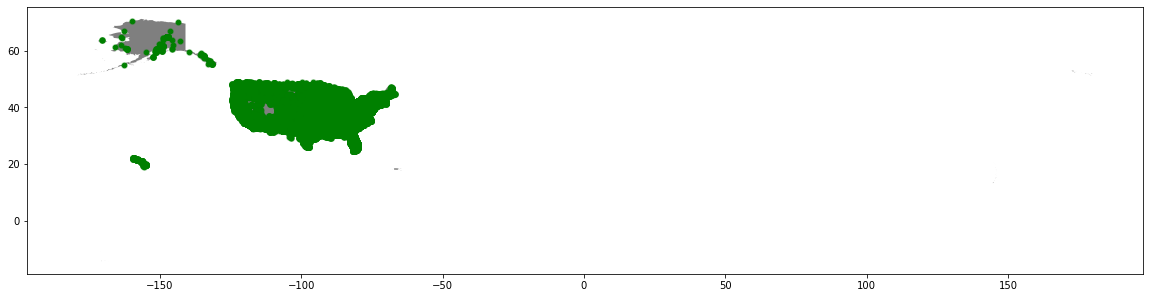

In [72]:
#Map of every datapoint for all time

fig,ax = plt.subplots(figsize = (20,10))
ufo_map.plot(color='black', ax = ax, alpha=0.5)
geo_alien_df.plot(ax = ax, alpha = 0.2, color ="green")
geo_alien_df.plot(ax = ax, markersize = 20, color = "green", marker = "o", label = "UFO Sighting")
plt.legend(prop={'size': 15})



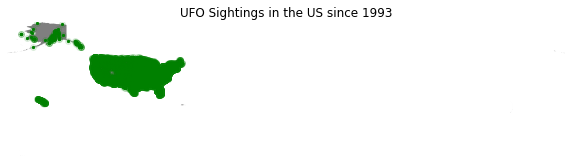

In [78]:
#Zoom into map 

#use the boundary set earlier to set the min and max values for the plot
ufo_map.total_bounds

# Plot the data with a modified spatial extent
fig, ax = plt.subplots(figsize = (10,6))
xlim = ([ufo_map.total_bounds[0],  ufo_map.total_bounds[2]])
ylim = ([ufo_map.total_bounds[1],  ufo_map.total_bounds[3]])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

#Plot map details 

ufo_map.plot(color='black', alpha = 0.5, ax = ax)
geo_alien_df.plot(color='green', ax=ax, alpha=0.1)

#Set title, legend, and axis
ax.set(title='UFO Sightings in the US since 1993')
geo_alien_df.plot(ax = ax, markersize = 5, color = "green", marker = "o", label = "UFO Sighting")
ax.set_axis_off()
plt.show()



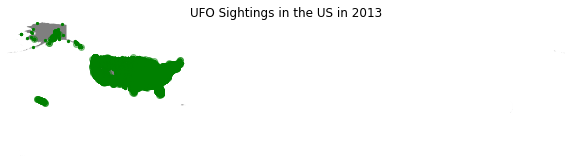

In [80]:
#Zoom into map 

#use the boundary set earlier to set the min and max values for the plot
ufo_map.total_bounds

# Plot the data with a modified spatial extent
fig, ax = plt.subplots(figsize = (10,6))
xlim = ([ufo_map.total_bounds[0],  ufo_map.total_bounds[2]])
ylim = ([ufo_map.total_bounds[1],  ufo_map.total_bounds[3]])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

#Plot map details 

ufo_map.plot(color='black', alpha = 0.5, ax = ax)
geo_alien_df[geo_alien_df['Year'] == 2013].plot(ax = ax, alpha = 0.4, color ="green")

#Set title, legend, and axis
ax.set(title='UFO Sightings in the US in 2013')
geo_alien_df.plot(ax = ax, markersize = 5, color = "green", marker = "o", label = "UFO Sighting")
ax.set_axis_off()
plt.show()

(-197.12167434999995, 197.72133134999996, 15.241829399999999, 74.0245006)

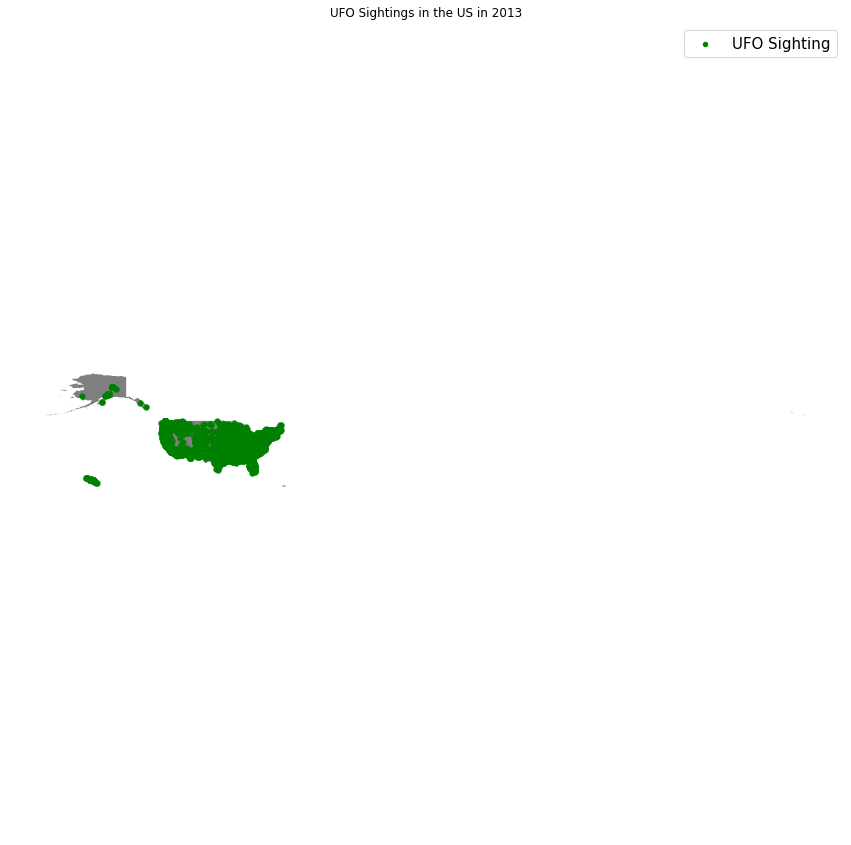

In [63]:
#Map of sightings in 2013 

fig,ax = plt.subplots(figsize = (15,15))
ufo_map.plot(color='black', ax = ax, alpha=0.5)
geo_alien_df[geo_alien_df['Year'] == 2013].plot(ax = ax, alpha = 0.4, color ="green")
geo_alien_df[geo_alien_df['Year'] == 2013].plot(ax = ax, markersize = 20, color = "green", marker = "o", label = "UFO Sighting")
plt.legend(prop={'size': 15})

ax.set(title='UFO Sightings in the US in 2013')
ax.set_axis_off()
plt.axis('equal')

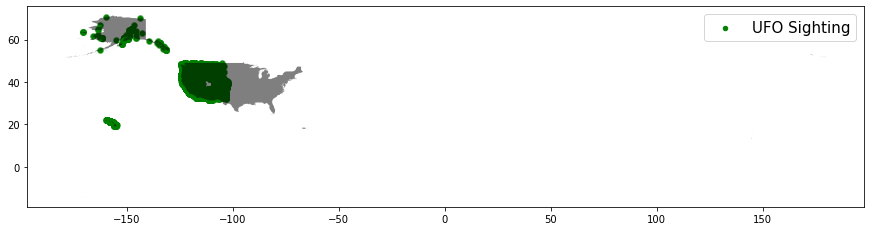

In [69]:
#Map of Western region 
#loc and make new df by West 
fig,ax = plt.subplots(figsize = (15,15))
geo_alien_df[geo_alien_df['region'] == 'West'].plot(ax = ax, alpha = 0.4, color ="green")
geo_alien_df[geo_alien_df['region'] == 'West'].plot(ax = ax, markersize = 20, color = "green", marker = "o", label = "UFO Sighting")
ufo_map.plot(color='black', ax=ax, alpha=.5)
plt.legend(prop={'size': 15})

In [39]:
#New method to plot data on map with detail 

# ufo_world_map = geo_alien_df.read_file(geo_alien_df.datasets.get_path('naturalearth_lowres'))
# base = ufo_world_map.plot(color='white', edgecolor='black')
# ufo_world_map.plot(ax=base, marker='o', color='red', markersize=5)

AttributeError: 'GeoDataFrame' object has no attribute 'read_file'